In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/WithLyrics.csv")

In [3]:
df.head()

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Lyrics
0,0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,...,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,"God said to Nietzsche: That’ll Tietzsche, You ..."
1,1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,...,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,NaN
2,2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,...,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,NaN
3,3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,...,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,NaN
4,4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,...,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,NaN


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [6]:
Lyrics = df['Lyrics']
ProperLyrics = []
def isNaN(string):
    return string != string

In [7]:
import numpy as np
for i in range(len(Lyrics)):
    if (isNaN(Lyrics[i])) != 1:
        ProperLyrics.append(i)

In [8]:
ProperLyrics

[0,
 5,
 7,
 18,
 25,
 26,
 27,
 32,
 33,
 35,
 36,
 40,
 42,
 48,
 51,
 55,
 59,
 62,
 64,
 66,
 67,
 69,
 70,
 72,
 81,
 82,
 83,
 85,
 91,
 93,
 99,
 100,
 104,
 107,
 108,
 110,
 111,
 112,
 115,
 117,
 118,
 119,
 121,
 122,
 125,
 126,
 127,
 128,
 130,
 132,
 133,
 139,
 141,
 145,
 148,
 149,
 155,
 156,
 157,
 159,
 160,
 163,
 166,
 167,
 168,
 169,
 171,
 173,
 175,
 176,
 178,
 181,
 182,
 184,
 185,
 188,
 190,
 191,
 192,
 193,
 195,
 196]

In [9]:
PropLyr = []
for i in ProperLyrics:
    PropLyr.append(Lyrics[i])

In [11]:
dtm = cv.fit_transform(PropLyr)

In [12]:
dtm

<82x13522 sparse matrix of type '<class 'numpy.int64'>'
	with 37618 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

In [33]:
LDA = LatentDirichletAllocation(n_components=20,random_state=42)

In [34]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=20, random_state=42)

In [35]:
len(cv.get_feature_names())

13522

In [36]:
LDA.components_

array([[0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       ...,
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 5.05, ..., 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, ..., 0.05, 0.05, 0.05]])

In [37]:
single_topic = LDA.components_[0]

In [38]:
single_topic.argsort()[-10:]

array([12243,  8257, 12240,  3406,  7534,  7309,  4227,  7794,  7578,
       11105])

In [39]:
top_word_indices = single_topic.argsort()[-10:]

In [40]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

tells
mother
tell
dad
like
know
don
mam
ll
says


In [41]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['want', 'day', 'bed', 'man', 'mr', 'tells', 'mother', 'tell', 'dad', 'like', 'know', 'don', 'mam', 'll', 'says']


THE TOP 15 WORDS FOR TOPIC #1
['alla', 'hook', 'mia', 'ho', 'vi', 'ha', 'yo', 'lo', 'mi', 'non', 'di', 'il', 'la', 'che', 'se']


THE TOP 15 WORDS FOR TOPIC #2
['mi', 'od', 'pa', 'ko', 'za', 'sam', 'kad', 'si', 'ne', 'ja', 'ti', 'na', 'se', 'da', 'je']


THE TOP 15 WORDS FOR TOPIC #3
['mata', 'le', 'bueno', 'happy', 'dale', 'mais', 'machete', 'los', 'pa', 'come', 'en', 'birthday', 'la', 'el', 'que']


THE TOP 15 WORDS FOR TOPIC #4
['headed', 'hey', 'boy', 'ma', 'day', 'little', 'elephant', 'stay', 'jungles', 'paul', 'east', 'st', 'lining', 'silver', 'look']


THE TOP 15 WORDS FOR TOPIC #5
['dance', 'make', 'nah', 'ain', 'niggas', 'verse', 'hit', 'big', 'got', 'chorus', 'nigga', 'need', 'oh', 'homie', 'yeah']


THE TOP 15 WORDS FOR TOPIC #6
['δε', 'σου', 'για', 'από', 'του', 'σε', 'θα', 'που', 'με', 'δεν', 'το', 'να', 'μου', 'και', 'την']


TH

In [42]:
dtm.shape

(82, 13522)

In [43]:
topic_results = LDA.transform(dtm)

In [44]:
topic_results.shape

(82, 20)

In [45]:
Topics = topic_results.argmax(axis=1)

In [46]:
len(Topics)

82

In [55]:
FinalTopics = []
count = 0
for i in range(len(df['Lyrics'])):
    if i in ProperLyrics:
        FinalTopics.append(Topics[count])
        count = count + 1
    else:
        FinalTopics.append(-1)

In [56]:
df['Song Topics'] = FinalTopics

In [57]:
df.head(100)

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,Lyrics,Song Topics
0,0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,...,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,"God said to Nietzsche: That’ll Tietzsche, You ...",19
1,1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,...,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,NaN,-1
2,2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,...,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,NaN,-1
3,3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,...,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,NaN,-1
4,4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,...,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.995,['Ignacio Corsini'],0.599,135507,0.1370,0,75Tt3zPHlYnejhusIUy50f,0.305,5,...,0,Cualquier Cosa - Remasterizado,0,1928-05-14,0.1610,137.384,0.6870,1928,NaN,-1
96,96,0.994,"['Francisco Canaro', 'Charlo']",0.615,170000,0.2050,0,75vvVnUqj8PlyJBAZ494p3,0.913,2,...,1,Pobre Gaucho - Remasterizado,0,1928-10-03,0.0618,58.299,0.7520,1928,NaN,-1
97,97,0.996,"['Alexander Scriabin', 'Vladimir Horowitz']",0.278,288907,0.0049,0,75yPZGkLb31Q4dRFqzMF5z,0.932,11,...,1,"Sonata No. 3, Op. 23 in F-Sharp Minor: III. An...",0,1928,0.0407,81.033,0.0606,1928,NaN,-1
98,98,0.996,"['Alexander Scriabin', 'Vladimir Horowitz']",0.393,48627,0.0545,0,75zIt9muIwtL6o30PcqskO,0.829,7,...,1,"Preludes: Op. 11, No. 3 in G",0,1928,0.0366,70.495,0.3740,1928,NaN,-1


In [58]:
numbers = []
for i in range(21):
    numbers.append(0)
for i in df['Song Topics']:
    numbers[i+1] = numbers[i+1] + 1

In [59]:
numbers

[118, 6, 7, 5, 4, 3, 4, 6, 4, 2, 1, 3, 2, 15, 3, 2, 2, 3, 1, 5, 4]

In [60]:
Topics

array([19,  1, 12,  5, 15,  0, 12, 17,  0,  3, 18, 12, 12, 10, 16,  7, 12,
       19, 16, 12,  3,  0, 12,  5,  7,  7, 12,  9, 12, 12,  0, 11,  8, 15,
        2, 10,  6, 19,  1,  4, 18,  4,  1, 18,  1, 13, 12,  8, 12,  2,  1,
       14,  7, 18,  2,  2, 10,  3,  4,  0, 19,  6, 12,  5, 12, 14,  1, 13,
       18, 11, 13,  1,  5,  0,  6,  6, 16,  3,  6,  6,  2, 12])

In [65]:
import matplotlib.pyplot as plt

In [66]:
frequencies = []
for i in range(1,len(numbers)):
    frequencies.append(numbers[i])

In [67]:
frequencies

[6, 7, 5, 4, 3, 4, 6, 4, 2, 1, 3, 2, 15, 3, 2, 2, 3, 1, 5, 4]

In [75]:
indexes = []
for i in range(len(frequencies)):
    indexes.append(i)

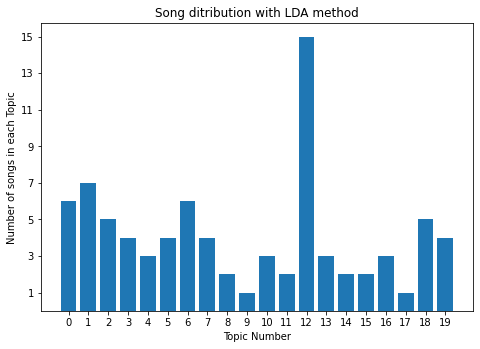

In [84]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(indexes,frequencies)
plt.xticks(np.arange(min(indexes), max(indexes)+1, 1.0))
plt.yticks(np.arange(min(frequencies), max(frequencies)+1, 2.0))
plt.xlabel('Topic Number')
plt.ylabel('Number of songs in each Topic')
plt.title('Song ditribution with LDA method')
plt.show()